Image size is: (500, 800)
Data type of image is: uint8


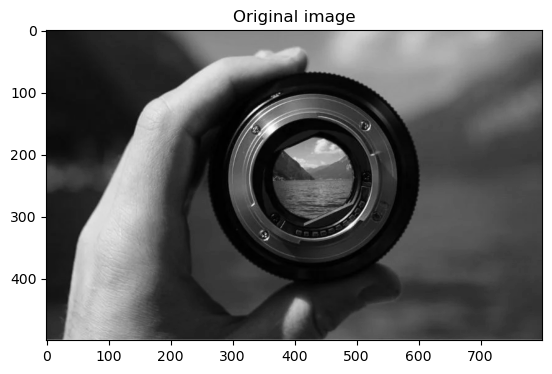

[[ 20  20  20 ... 127 127 127]
 [ 20  20  20 ... 127 127 127]
 [ 20  20  20 ... 127 127 127]
 ...
 [ 47  47  47 ...  57  57  57]
 [ 44  44  44 ...  57  57  57]
 [119 119 119 ... 116 116 116]]


In [49]:
"""
Задача: реализовать три типа фильтров:
1. Фильтр размытия
2. Фильтр увеличения чёткости
3. Фильтр размытия (медианой)

Группа: КВБО-07-21
Выполняли: Быковский В.А., Ванюшин С.Р., Данилова Д.П.
"""
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

# pattern1.png | pattern2.jpeg | pattern3.jpeg
img = cv2.imread('pattern1.png', cv2.IMREAD_GRAYSCALE)

print("Image size is:", img.shape)
print("Data type of image is:", img.dtype)

plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.show()

print(img)

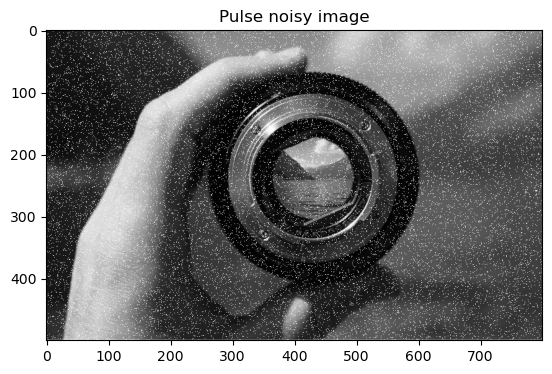

[[ 20  20  20 ... 127 255 127]
 [ 20  20  20 ... 127 127 127]
 [ 20  20  20 ... 127 127 127]
 ...
 [ 47  47  47 ...  57  57 255]
 [ 44  44  44 ...  57  57  57]
 [119 119 119 ... 116 116 116]]


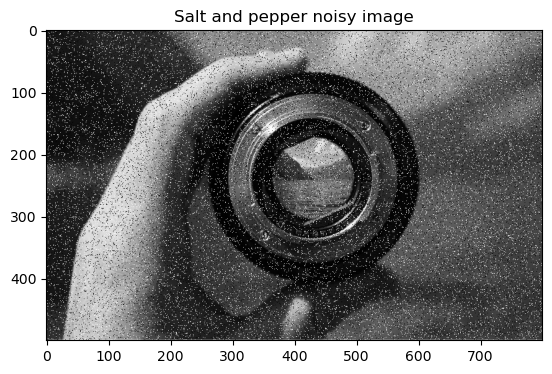

[[ 20  20  20 ... 127 127 127]
 [ 20  20  20 ... 127 127 127]
 [ 20  20  20 ... 127 127 127]
 ...
 [ 47 255  47 ...  57  57  57]
 [ 44  44  44 ...  57  57  57]
 [119 119   0 ... 116 116 116]]


In [50]:
def pulse_noise_generator(img):
    """
    Осуществляет заполнение изображения импульсным шумом.
    
    :param img: матрица исходного изображения
    
    :return noisy_img: матрица зашумленного изображения
    
    """
    noise_share = 0.05
    noisy_img = np.copy(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if noise_share >= random.random():
                noisy_img[i, j] = 255
                
    return noisy_img

def salt_and_pepper_noise_generator(img):
    """
    Осуществляет заполнение изображения шумом типа соль-перец.
    
    :param img: матрица исходного изображения
    
    :return noisy_img: матрица зашумленного изображения
    
    """
    noise_share = 0.1
    noisy_img = np.copy(img)
    
    for i in range(noisy_img.shape[0]):
        for j in range(noisy_img.shape[1]):
            if noise_share >= random.random():
                noisy_img[i, j] = 0 if bool(random.getrandbits(1)) else 255
                
    return noisy_img

pulse_noisy_img = pulse_noise_generator(img)
salt_and_pepper_noisy_img = salt_and_pepper_noise_generator(img)

plt.imshow(pulse_noisy_img, cmap='gray')
plt.title("Pulse noisy image")
plt.show()

print(pulse_noisy_img)

plt.imshow(salt_and_pepper_noisy_img, cmap='gray')
plt.title("Salt and pepper noisy image")
plt.show()

print(salt_and_pepper_noisy_img)

In [51]:
def image_expansion(img, kernel_dimension=3):
    """
    Осуществляет расширение матрицы исходного изображения нулями со всех сторон.
    Принимаются только нечётные значния kernel_dimension, начиная от 0.
    
    :param img: матрица исходного изображения
    :param kernel_dimension: размерность матрицы фильтра для каждой из осей
    
    :return extended_img: расширенная матрица
    
    """
    frame = kernel_dimension // 2 # величина расширения
    
    extended_img = np.concatenate(
        (np.zeros((img.shape[0], frame), dtype='uint8'),
         img,
         np.zeros((img.shape[0], frame), dtype='uint8'),
         ),
        dtype='uint8',
        axis=1
    )

    extended_img = np.concatenate(
        (np.zeros((frame, img.shape[1] + frame * 2), dtype='uint8'),
         extended_img,
         np.zeros((frame, img.shape[1] + frame * 2), dtype='uint8'),
         ),
        dtype='uint8'
    )

    return extended_img

In [52]:
def blur_filter(img, kernel_dimension=3):
    """
    Осуществляет размытие изображения.
    Принимаются только нечётные значния kernel_dimension, начиная от 0.
    
    :param img: матрица исходного изображения
    :param kernel_dimension: размерность матрицы фильтра для каждой из осей
    
    :return blur_img: матрица размытого изображения
    
    """
    frame = kernel_dimension // 2 # величина расширения
    
    blur_img = np.zeros(img.shape, dtype='uint8')
    img = image_expansion(img, kernel_dimension)
    blur_kernel = 1 / np.power(kernel_dimension, 2) * np.array([[1] * kernel_dimension] * kernel_dimension)
    
    for i in range(frame, img.shape[0] - frame):
        for j in range(frame, img.shape[1] - frame):
            submatrix = img[i - frame : i + frame + 1, j - frame : j + frame + 1]
            blur_img[i - frame, j - frame] = np.sum(np.multiply(submatrix, blur_kernel))
    
    return blur_img

def sharp_filter(img, kernel_dimension=3, power=1):
    """
    Осуществляет увеличение резкости изображения.
    Принимаются только нечётные значния kernel_dimension, начиная от 0.
    Значения power следует брать от 0.(Рекомендуемые значения: 0.1 - 0.5)
    
    :param img: матрица исходного изображения
    :param kernel_dimension: размерность матрицы фильтра для каждой из осей
    :param power: коэффициент усиления резкости
    
    :return sharp_img: матрица изображения с увеличенной резкостью
    
    """
    frame = kernel_dimension // 2 # величина расширения
    
    sharp_img = np.zeros(img.shape, dtype='uint8')
    img = image_expansion(img)

    sharp_kernel = np.array([[-1] * kernel_dimension] * kernel_dimension)
    sharp_kernel[frame, frame] = sharp_kernel[frame, frame] - np.sum(sharp_kernel) + 1/power
    sharp_kernel = sharp_kernel * power
    
    for i in range(frame, img.shape[0] - frame):
        for j in range(frame, img.shape[1] - frame):
            submatrix = img[i - frame : i + frame + 1, j - frame : j + frame + 1]
            sharp_img[i - frame, j - frame] = np.sum(np.multiply(submatrix, sharp_kernel))
    
    return sharp_img

def median_filter(img, kernel_dimension=3):
    """
    Осуществляет фильтрацию изображения от шумов.
    Принимаются только нечётные значния kernel_dimension, начиная от 0.
    
    :param img: матрица исходного изображения
    :param kernel_dimension: размерность матрицы фильтра для каждой из осей
    
    :return median_img: отфильтрованное изображение
    
    """
    frame = kernel_dimension // 2 # величина расширения
    
    median_img = np.zeros(img.shape, dtype='uint8')
    img = image_expansion(img, kernel_dimension)
    
    for i in range(frame, img.shape[0] - frame):
        for j in range(frame, img.shape[1] - frame):
            submatrix = img[i - frame : i + frame + 1, j - frame : j + frame + 1]
            
            sorted_env = np.sort(submatrix.flatten())
            median_img[i - frame, j - frame] = sorted_env[len(sorted_env) // 2]

    return median_img

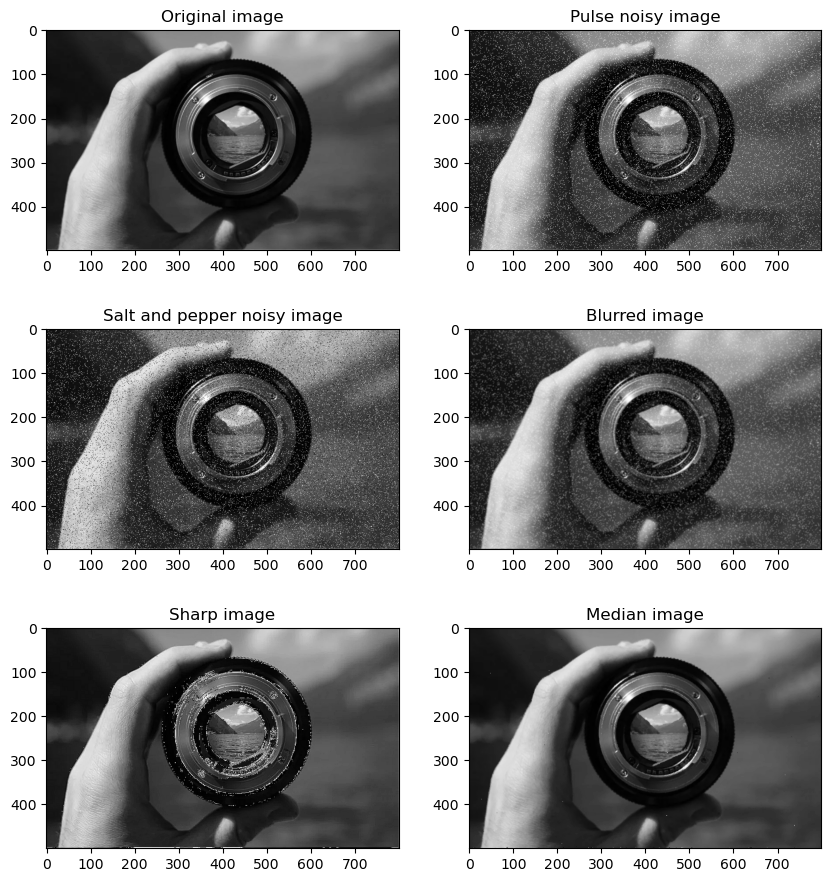

In [54]:
plt.figure(figsize=[10, 11])

plt.subplot(321);
plt.imshow(img, cmap='gray');
plt.title("Original image")

plt.subplot(322);
plt.imshow(pulse_noisy_img, cmap='gray');
plt.title("Pulse noisy image")

plt.subplot(323);
plt.imshow(salt_and_pepper_noisy_img, cmap='gray');
plt.title("Salt and pepper noisy image")

plt.subplot(324);
plt.imshow(blur_filter(pulse_noisy_img, kernel_dimension=3), cmap='gray');
plt.title("Blurred image")

plt.subplot(325);
plt.imshow(sharp_filter(img, kernel_dimension=3, power=0.25), cmap='gray');
plt.title("Sharp image")

plt.subplot(326);
plt.imshow(median_filter(salt_and_pepper_noisy_img, kernel_dimension=3), cmap='gray');
plt.title("Median image")

plt.show()